In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
orders = pd.read_csv('../data/cleaned/orders.csv')
order_items = pd.read_csv('../data/cleaned/order_items.csv')
products = pd.read_csv('../data/cleaned/products.csv')
customers = pd.read_csv('../data/cleaned/customers.csv')


In [3]:
df = (
    order_items
    .merge(orders, on='order_id', how='inner')
    .merge(products, on='product_id', how='left')
)


In [4]:
product_revenue = (
    df.groupby('product_id')['price']
      .sum()
      .sort_values(ascending=False)
)


In [5]:
cumulative_revenue = product_revenue.cumsum() / product_revenue.sum()


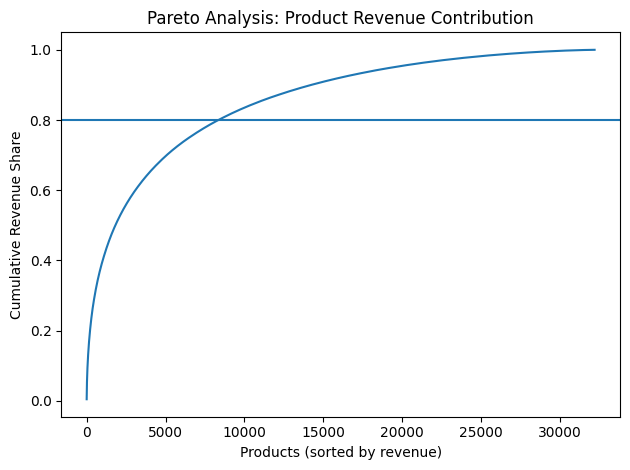

In [6]:
plt.figure()
plt.plot(cumulative_revenue.values)
plt.axhline(0.8)
plt.title('Pareto Analysis: Product Revenue Contribution')
plt.xlabel('Products (sorted by revenue)')
plt.ylabel('Cumulative Revenue Share')
plt.tight_layout()
plt.show()


In [7]:
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp']
)


In [8]:
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

orders['cohort_month'] = (
    orders.groupby('customer_id')['order_purchase_timestamp']
          .transform('min')
          .dt.to_period('M')
)


In [9]:
def cohort_index(df):
    return (
        (df['order_month'].dt.year - df['cohort_month'].dt.year) * 12 +
        (df['order_month'].dt.month - df['cohort_month'].dt.month) + 1
    )

orders['cohort_index'] = cohort_index(orders)


In [10]:
cohort_data = (
    orders.groupby(['cohort_month', 'cohort_index'])['customer_id']
          .nunique()
          .reset_index()
)

cohort_pivot = cohort_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='customer_id'
)

cohort_pivot


cohort_index,1
cohort_month,
2016-09,1
2016-10,265
2016-12,1
2017-01,750
2017-02,1653
2017-03,2546
2017-04,2303
2017-05,3546
2017-06,3135
